In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import numpy as np

In [137]:
weather_data=pd.read_csv(r"C:\Users\EVANS\OneDrive\Desktop\python\local_weather.csv",index_col="DATE")

In [138]:
weather_data.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [139]:
weather_data.shape

(16859, 35)

In [140]:
weather_data.isna().sum()/weather_data.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

In [141]:
weather_data=weather_data[["PRCP","SNOW","SNWD","TMAX","TMIN"]]

In [142]:
weather_data.head()

,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0


In [143]:
weather_data.isnull().sum()/weather_data.shape[0]

PRCP    0.016668
SNOW    0.324990
SNWD    0.317634
TMAX    0.000534
TMIN    0.000593
dtype: float64

In [144]:
weather_data.isnull().sum()

PRCP     281
SNOW    5479
SNWD    5355
TMAX       9
TMIN      10
dtype: int64

In [145]:
weather_data.columns=["Precip","Snow","Snow_depth","Tem_max","Tem_min"]

In [146]:
weather_data.head()

,Precip,Snow,Snow_depth,Tem_max,Tem_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0


In [147]:
#cleaning NA values
weather_data["Snow"].value_counts()

Snow
0.0    11379
1.0        1
Name: count, dtype: int64

In [148]:
del weather_data["Snow"]

In [149]:
del weather_data["Snow_depth"]

In [150]:
weather_data["Precip"].value_counts()

Precip
0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: count, Length: 176, dtype: int64

In [151]:
weather_data[pd.isna(weather_data["Precip"])]

,Precip,Tem_max,Tem_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [152]:
weather_data.loc["1983-10-29":"1983-11-13"]

,Precip,Tem_max,Tem_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-01,0.26,69.0,60.0
1983-11-02,0.06,68.0,56.0
1983-11-03,0.00,68.0,56.0
1983-11-04,0.00,67.0,55.0
1983-11-05,0.00,66.0,51.0
1983-11-06,0.00,69.0,53.0


In [153]:
weather_data["Precip"]=weather_data["Precip"].fillna(0)

In [154]:
weather_data.isna().sum()

Precip      0
Tem_max     9
Tem_min    10
dtype: int64

In [155]:
weather_data["Tem_max"]=weather_data["Tem_max"].fillna(method="ffill")
weather_data["Tem_min"]=weather_data["Tem_min"].fillna(method="ffill")

C:\Users\EVANS\AppData\Local\Temp\ipykernel_21884\1844255479.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data["Tem_max"]=weather_data["Tem_max"].fillna(method="ffill")
C:\Users\EVANS\AppData\Local\Temp\ipykernel_21884\1844255479.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data["Tem_min"]=weather_data["Tem_min"].fillna(method="ffill")


In [156]:
weather_data.isna().sum()

Precip     0
Tem_max    0
Tem_min    0
dtype: int64

In [157]:
weather_data.dtypes

Precip     float64
Tem_max    float64
Tem_min    float64
dtype: object

In [158]:
weather_data.index=pd.to_datetime(weather_data.index)

In [159]:
weather_data.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int32', name='DATE', length=16859)

In [160]:
weather_data.apply(lambda x:(x==999)).sum()

Precip     0
Tem_max    0
Tem_min    0
dtype: int64

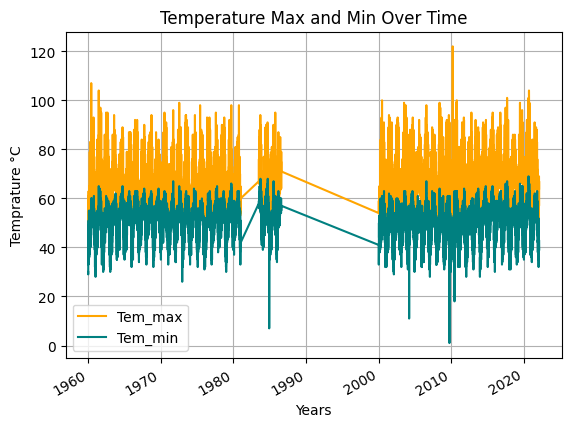

In [161]:
weather_data[["Tem_max","Tem_min"]].plot(color=["orange", "teal"])
plt.title("Temperature Max and Min Over Time")
plt.xlabel("Years")
plt.ylabel("Temprature °C")
plt.grid(True)

In [162]:
weather_data.index.year.value_counts().sort_index()

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: count, dtype: int64

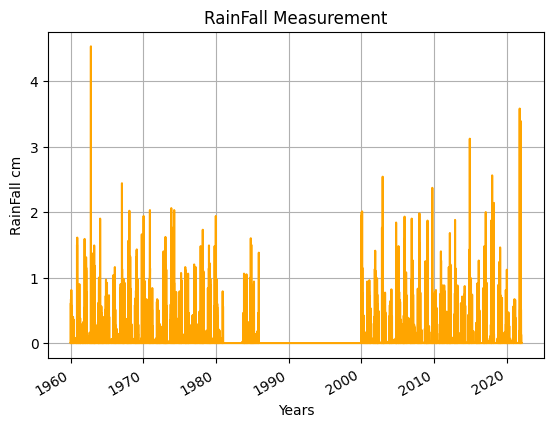

In [163]:
weather_data["Precip"].plot(color="orange")
plt.title("RainFall Measurement")
plt.xlabel("Years")
plt.ylabel("RainFall cm")
plt.grid(True)

In [164]:
weather_data.groupby(weather_data.index.year).sum()

,Precip,Tem_max,Tem_min
DATE,,,
1960,14.01,24135.0,17973.0
1961,13.87,24202.0,17819.0
1962,22.47,23785.0,17880.0
1963,19.11,23470.0,18237.0
1964,16.83,23013.0,18637.0
1965,16.32,23181.0,18715.0
1966,13.11,23680.0,18991.0
1967,23.98,23433.0,18668.0
1968,17.19,23634.0,18859.0


In [165]:
weather_data["Target"]=weather_data.shift(-1)["Tem_max"]

In [166]:
weather_data

,Precip,Tem_max,Tem_min,Target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [167]:
weather_data=weather_data.iloc[:-1,:].copy()

In [168]:
weather_data

,Precip,Tem_max,Tem_min,Target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [169]:
#ML Ridge regression
reg=Ridge(alpha=.1)

In [170]:
predictors=["Precip","Tem_max","Tem_min"]

In [171]:
train=weather_data.loc[:"2020-12-31"]
test=weather_data.loc["2020-12-13":]

In [172]:
reg.fit(train[predictors],train["Target"])

Ridge(alpha=0.1)

In [173]:
predictions=reg.predict(test[predictors])

In [174]:
mean_absolute_error(test["Target"],predictions)

3.363830179475887

In [175]:
combined=pd.concat([test["Target"],pd.Series(predictions, index=test.index)],axis=1)
combined.columns=["Actual","Predicted"]

In [176]:
combined

,Actual,Predicted
DATE,,
2020-12-13,58.0,60.187148
2020-12-14,59.0,58.902819
2020-12-15,60.0,59.623957
2020-12-16,61.0,60.345095
2020-12-17,62.0,61.466325
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


<Axes: xlabel='DATE'>

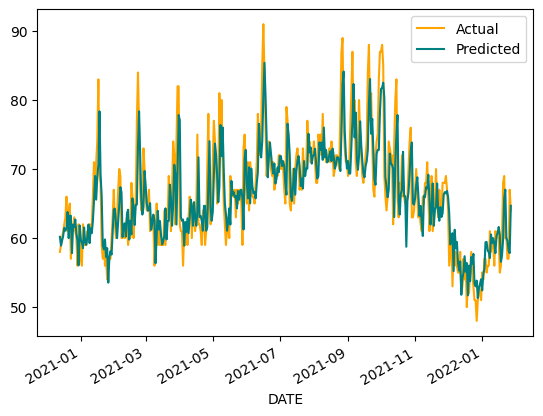

In [177]:
combined.plot(color=("orange", "teal"))

In [178]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [179]:
def create_prediction(predictors,core_weather,reg):
    train=weather_data.loc[:"2020-12-31"]
    test=weather_data.loc["2020-12-13":]
    reg.fit(train[predictors],train["Target"])
    predictions=reg.predict(test[predictors])
    error=mean_absolute_error(test["Target"],predictions)
    combined=pd.concat([test["Target"],pd.Series(predictions, index=test.index)],axis=1)
    combined.columns=["Actual","Predicted"]
    return error,combined


In [180]:
weather_data["month_max"]=weather_data["Tem_max"].rolling(30).mean()

In [181]:
weather_data["weather_max_day"]=weather_data["month_max"]/weather_data["Tem_max"]

In [182]:
weather_data["max_min"]=weather_data["Tem_max"]/weather_data["Tem_min"]

In [183]:
weather_data=weather_data.iloc[30:,:].copy()

In [184]:
predictors=["Precip","Tem_max","Tem_min","month_max","weather_max_day","max_min"]

In [185]:
error,combined=create_prediction(predictors,weather_data,reg)

In [186]:
error

3.313134063412924

<Axes: xlabel='DATE'>

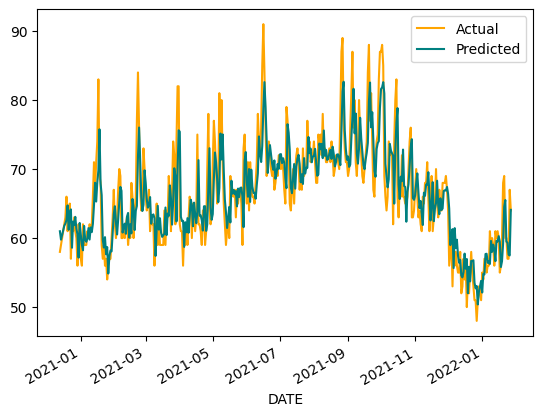

In [187]:
combined.plot(color=("orange", "teal"))

In [188]:
weather_data['monthly_avg'] = weather_data.groupby(weather_data.index.month)['Tem_max'].transform(lambda x: x.expanding(1).mean())

In [189]:
weather_data.sample(4)

,Precip,Tem_max,Tem_min,Target,month_max,weather_max_day,max_min,monthly_avg
DATE,,,,,,,,
2017-01-26,0.00,56.0,44.0,58.0,56.633333,1.011310,1.272727,56.419890
1962-12-15,0.88,63.0,57.0,57.0,61.200000,0.971429,1.105263,56.142857
2005-12-14,0.00,56.0,36.0,57.0,62.100000,1.108929,1.555556,55.828039
2019-12-25,0.06,55.0,48.0,59.0,58.533333,1.064242,1.145833,56.544919


In [190]:
weather_data["day_of_year_avg"]=weather_data["Tem_max"].groupby(weather_data.index.day_of_year).transform(lambda x: x.expanding(1).mean())

In [191]:
weather_data

,Precip,Tem_max,Tem_min,Target,month_max,weather_max_day,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536,57.130435
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803,57.239130
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955,57.347826


In [192]:
predictors=["Precip","Tem_max","Tem_min","month_max","weather_max_day","max_min","monthly_avg","day_of_year_avg"]
error,combined=create_prediction(predictors,weather_data,reg)

In [193]:
error

3.2735367963143793

In [194]:
reg.coef_

array([ -0.90804013,   0.40146278,   0.03114081,   0.33672074,
       -15.97061869,   0.0493612 ,   0.14343362,   0.08006707])

In [195]:
weather_data.corr()["Target"]

Precip            -0.205413
Tem_max            0.821650
Tem_min            0.596016
Target             1.000000
month_max          0.686842
weather_max_day   -0.421537
max_min            0.045228
monthly_avg        0.689805
day_of_year_avg    0.712334
Name: Target, dtype: float64

In [196]:
combined["difference"]=(combined["Actual"]-combined["Predicted"]).abs()
combined.sample(6)

,Actual,Predicted,difference
DATE,,,
2021-01-12,66.0,61.067628,4.932372
2021-03-03,65.0,63.878028,1.121972
2022-01-07,56.0,56.552479,0.552479
2021-05-30,75.0,71.287661,3.712339
2021-06-03,64.0,70.508477,6.508477
2021-09-23,74.0,78.568222,4.568222
